In [1]:
import networkx as nx
import numpy as np
import math
from scipy.integrate import odeint
from scipy.optimize import fsolve
import copy
import matplotlib
import matplotlib.pylab as plt

In [176]:
def sir_deriv(y, t, N, beta, gamma): #basic SIR equations
    S, I, R = y
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt
    

def sir_run(N,initial_i, t, beta, gamma):
    
    #initial conditions
    S0 = N - initial_i
    I0 = initial_i
    R0 = 0
    y0 = S0 / N ,I0 / N,R0
    
    #solve the ODEs for every step of t
    y = odeint(sir_deriv, y0, t, args=(N,beta,gamma))
    St, It, Rt = y.T
    
    return St,It,Rt


def sir_plot(St,It,Rt,t):
    #plot the output
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    plt.plot(t, St, 'b', alpha=0.5,label='S(t)')
    plt.plot(t, It, 'r', alpha=0.5,label='I(t)')
    plt.plot(t, Rt, 'g', alpha=0.5,label='R(t)')
    plt.ylabel('population, N')
    plt.xlabel('time, t')
    plt.legend(loc='upper right', title="Abigail");
    plt.show()
    return

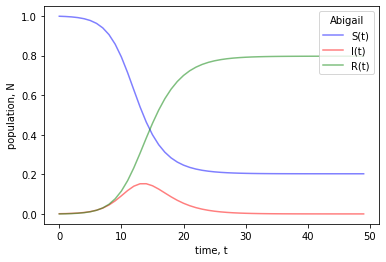

In [13]:
t = range(50)
St,It,Rt = sir_run(1000, 1, t, 1, 0.5)
sir_plot(St,It,Rt,t)

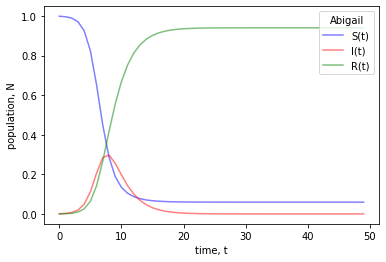

In [14]:
t = range(50)
St,It,Rt = sir_run(1000, 1, t, 1.5, 0.5)
sir_plot(St,It,Rt,t)

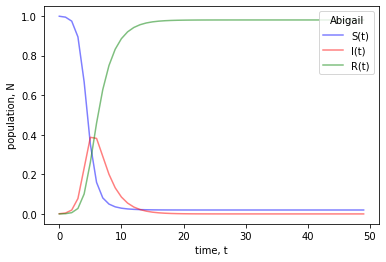

In [15]:
t = range(50)
St,It,Rt = sir_run(1000, 1, t, 2, 0.5)
sir_plot(St,It,Rt,t)

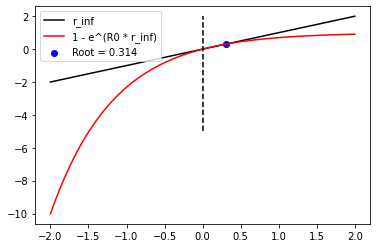

In [189]:
def f(rInf, R0): # f(rInf) - g(rInf)
    return rInf - (1 - np.exp(-R0 * rInf))

def solve(R0): #wrote as function to make it easier to change R0 
    return fsolve(f, 1, args=(R0))

root = solve(1.2)
rInf = np.linspace(-2, 2, 100) #create axis values

#plot output
plt.plot(rInf, rInf, color="black",label='r_inf')
plt.plot(rInf, 1 - np.exp(-R0 * rInf), color="red", label='1 - e^(R0 * r_inf)')
plt.plot((0, 0), (-5, 2), color="black", linestyle="--", scaley=False) #centerline
plt.scatter(root, root, color='blue', label=f'Root = {root[0]:.3f}')
plt.legend(loc='upper left');
plt.show()

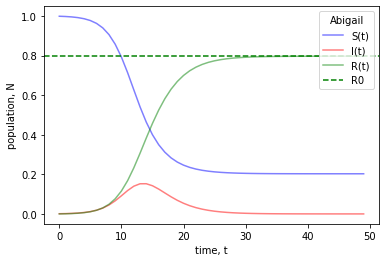

In [190]:
t = range(50)
St,It,Rt = sir_run(1000, 1, t, 1, 0.5) 

root = solve(2) # beta/gamma = 1/0.5 = 2

def sir_plot2(St,It,Rt,t): #slighly modified funtion to include size prediction
    
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    plt.plot(t, St, 'b', alpha=0.5,label='S(t)')
    plt.plot(t, It, 'r', alpha=0.5,label='I(t)')
    plt.plot(t, Rt, 'g', alpha=0.5,label='R(t)')
    plt.axhline(root, color = 'green', linestyle = '--', label = "R0")
    plt.ylabel('population, N')
    plt.xlabel('time, t')
    plt.legend(loc='upper right', title="Abigail");
    plt.show()
    return

sir_plot2(St,It,Rt,t)